## Importing the Data

We will start by importing the data and taking a look at the first few rows.

In [8]:

# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (6504, 15)
Loaded Validation features dimensions: (1858, 15)
Loaded Test features dimensions: (930, 15)

Loaded Training labels dimensions: (6504, 1)
Loaded Validation labels dimensions: (1858, 1)
Loaded Test labels dimensions: (930, 1)

First few rows of loaded training features:
   holiday  IsWeekend  IsNewYears  Easter  KielerWoche    sin_1y    cos_1y  \
0        0          1           0       0            0  0.385413  0.922744   
1        0          1           0       0            0  0.888701 -0.458487   
2        0          1           0       0            0 -0.175413  0.984495   
3        1          0           0       0            0 -0.824765 -0.565476   
4        0          0           0       0            0  0.950790  0.309835   

     sin_2y  Revenue_lag1  Revenue_lag7  WG_2  WG_3  WG_4  WG_5  WG_6  
0  0.711276     74.601008     86.547766     0     0     1     0     0  
1 -0.814916    145.377113     68.330153     0     0     0     0     

## Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 15)             │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269 (1.05 KB)

 Trainable params: 239 (956.00 B)

 Non-trainable params: 30 (120.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [10]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20


204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 63927.7852 - val_loss: 58571.0781
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53618.5273 - val_loss: 36369.6445
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19531.7480 - val_loss: 7791.7329
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6489.1567 - val_loss: 6368.7090
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5697.5166 - val_loss: 5774.2197
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5250.6191 - val_loss: 5502.6562
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5011.1328 - val_loss: 5207.0117
Epoch 8/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4741.5264 - val_loss: 5008.3540
Epoch 9/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4763.4688 - val_loss: 4884.6099
Epoch 10/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4658.5015 - val_loss: 4746.6304
Epoch 11/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4592.2988 - val_loss: 46

## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [11]:
model.save("python_model.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

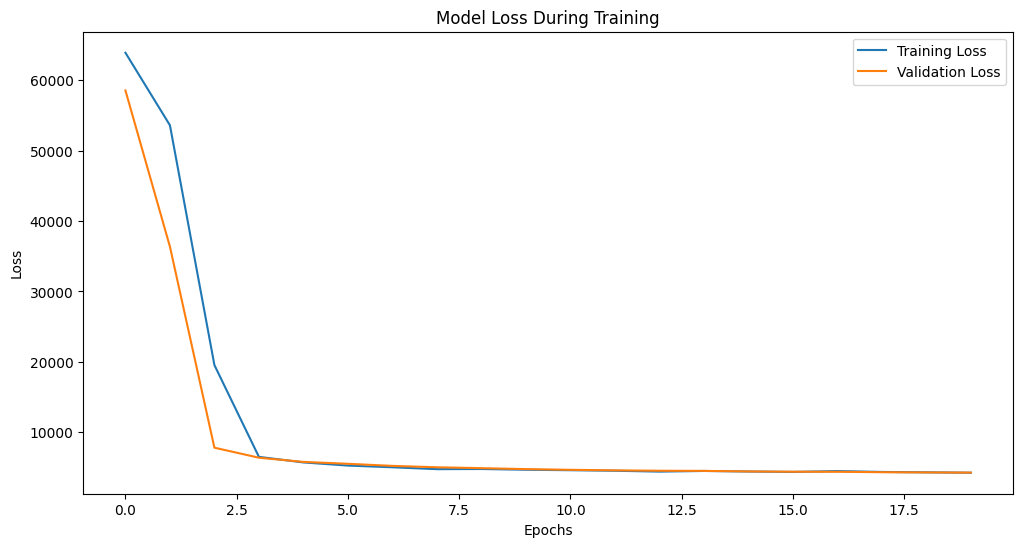

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [16]:
import numpy as np
import pandas as pd

# -----------------------------
# MAPE FUNCTION (SAFE VERSION)
# -----------------------------
def mape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    denom = np.maximum(np.abs(y_true), eps)
    return 100.0 * np.mean(np.abs(y_true - y_pred) / denom)


# -----------------------------
# PREDICTIONS
# -----------------------------
training_predictions = model.predict(training_features).reshape(-1)
validation_predictions = model.predict(validation_features).reshape(-1)

training_labels = np.asarray(training_labels).reshape(-1)
validation_labels = np.asarray(validation_labels).reshape(-1)


# -----------------------------
# OVERALL MAPE
# -----------------------------
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


# -----------------------------
# RECONSTRUCT WARENGRUPPE FROM DUMMIES
# WG_2 ... WG_6 exist, WG_1 is the reference group
# -----------------------------
def reconstruct_wg(df):
    wg_cols = [c for c in df.columns if c.startswith("WG_")]
    
    # Default group = 1 (reference)
    wg = np.ones(len(df), dtype=int)
    
    for col in wg_cols:
        group_number = int(col.split("_")[1])
        wg[df[col] == 1] = group_number
    
    return wg


training_wg = reconstruct_wg(training_features)
validation_wg = reconstruct_wg(validation_features)


# -----------------------------
# BUILD DATAFRAMES FOR GROUPED EVALUATION
# -----------------------------
train_df = pd.DataFrame({
    "Warengruppe": training_wg,
    "y_true": training_labels,
    "y_pred": training_predictions
})

val_df = pd.DataFrame({
    "Warengruppe": validation_wg,
    "y_true": validation_labels,
    "y_pred": validation_predictions
})


# -----------------------------
# MAPE PER WARENGRUPPE
# -----------------------------


mape_val_wg = (
    val_df
    .groupby("Warengruppe")
    .apply(lambda x: mape(x["y_true"], x["y_pred"]))
    .reset_index(name="MAPE_Validation")
)

mape_per_wg = (
    mape_val_wg.sort_values("Warengruppe")
)

print("\nMAPE per product category (Warengruppe):")
print(mape_per_wg)

 48/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step
MAPE on the Training Data: 22.23%
MAPE on the Validation Data: 24.60%

MAPE per product category (Warengruppe):
   Warengruppe  MAPE_Validation
0            1        40.634784
1            2        13.681085
2            3        16.223104
3            4        33.066130
4            5        14.525836
5            6        45.641443


/tmp/ipykernel_48125/1605067739.py:76: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: mape(x["y_true"], x["y_pred"]))


## Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


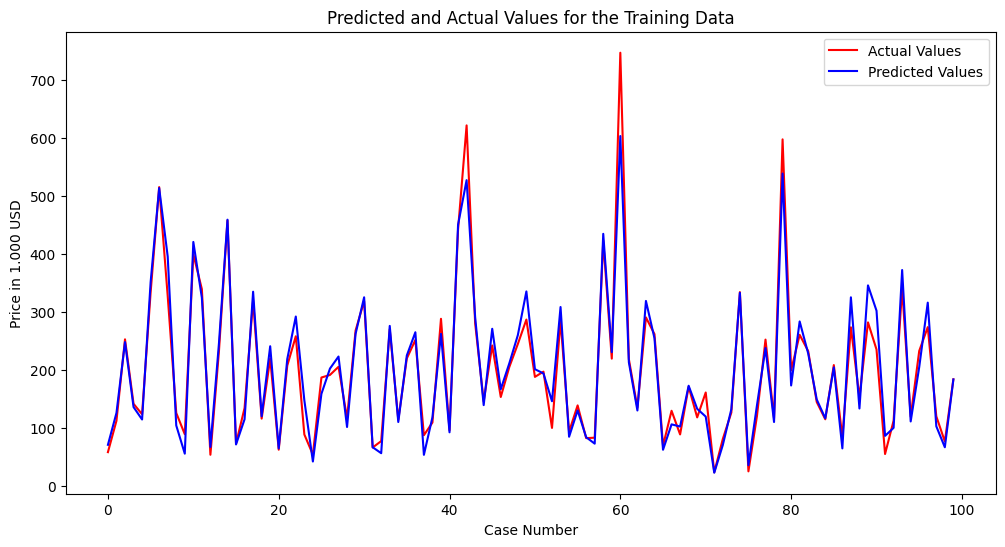

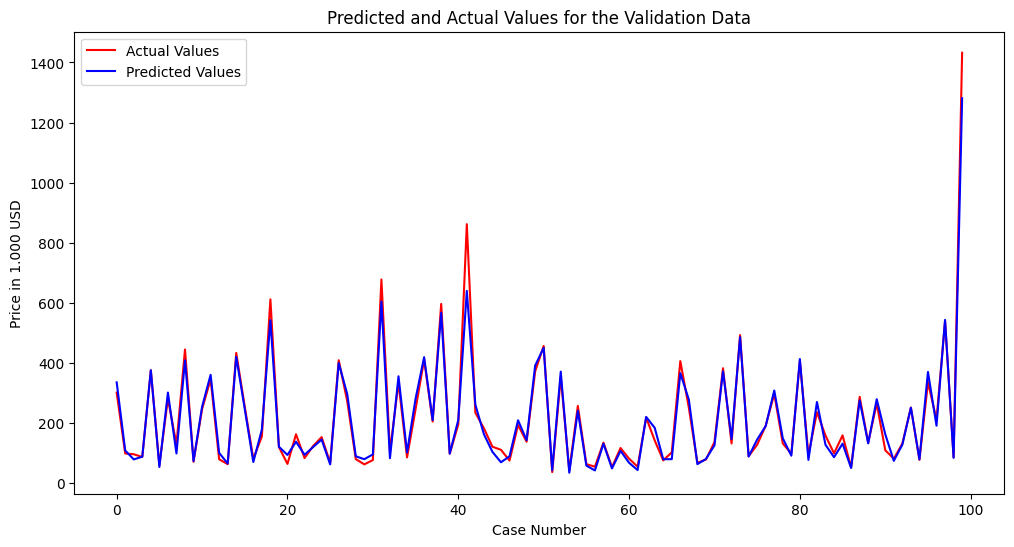

In [ ]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')